In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display

In [11]:
# Load audio
filename='avm.wav'
y, sr = librosa.load(filename)

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# Stack these together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

# Harmonic-percussive source separation
y_harmonic, y_percussive = librosa.effects.hpss(y)

# We'll use a CQT-based chromagram here.  An STFT-based implementation also exists in chroma_cqt()
# We'll use the harmonic component to avoid pollution from transients
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

In [12]:
# Now, let's run the beat tracker.
# We'll use the percussive component for this part
tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)

In [13]:
M_sync = librosa.util.sync(M, beats)

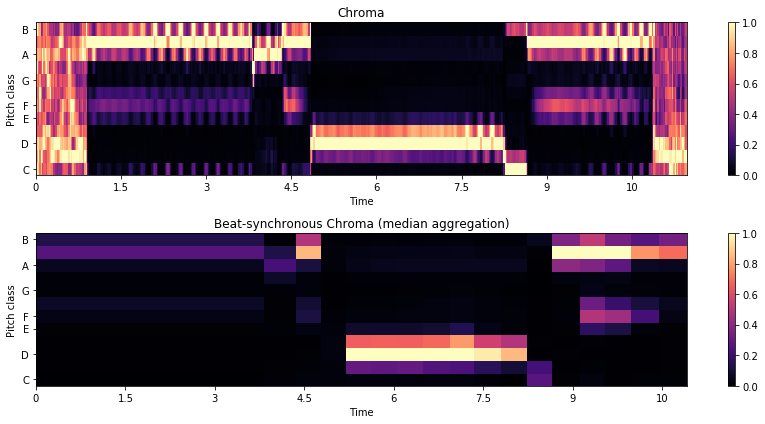

In [16]:

C_sync = librosa.util.sync(C, beats, aggregate=np.min)

plt.figure(figsize=(12,6))

plt.subplot(2, 1, 1)
librosa.display.specshow(C, sr=sr, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time')

plt.title('Chroma')
plt.colorbar()

plt.subplot(2, 1, 2)
librosa.display.specshow(C_sync, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time', 
                         x_coords=librosa.frames_to_time(librosa.util.fix_frames(beats)))


plt.title('Beat-synchronous Chroma (median aggregation)')

plt.colorbar()
plt.tight_layout()

In [30]:
def beatsyncFunc(filename, title1, title2):
    # Load audio
    
    y, sr = librosa.load(filename)

    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.power_to_db(S, ref=np.max)

    # Extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
    mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)

    # Let's pad on the first and second deltas while we're at it
    delta_mfcc  = librosa.feature.delta(mfcc)
    delta2_mfcc = librosa.feature.delta(mfcc, order=2)

    # Stack these together into one matrix
    M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

    # Harmonic-percussive source separation
    y_harmonic, y_percussive = librosa.effects.hpss(y)

    # We'll use a CQT-based chromagram here.  An STFT-based implementation also exists in chroma_cqt()
    # We'll use the harmonic component to avoid pollution from transients
    C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)
    
    # Now, let's run the beat tracker.
    # We'll use the percussive component for this part
    tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)
    M_sync = librosa.util.sync(M, beats)
    
    C_sync = librosa.util.sync(C, beats, aggregate=np.min)

    plt.figure(figsize=(12,6))

    plt.subplot(2, 1, 1)
    librosa.display.specshow(C, sr=sr, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time')

    plt.title(title1)
    plt.colorbar()

    plt.subplot(2, 1, 2)
    librosa.display.specshow(C_sync, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time', 
                         x_coords=librosa.frames_to_time(librosa.util.fix_frames(beats)))


    plt.title(title2)

    plt.colorbar()
    plt.tight_layout()
    

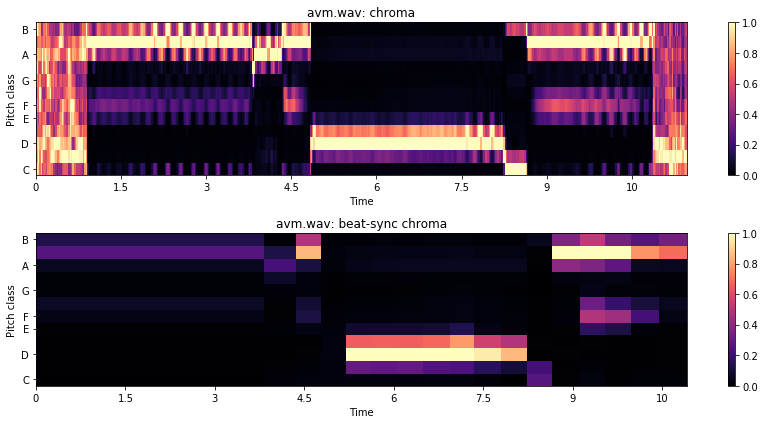

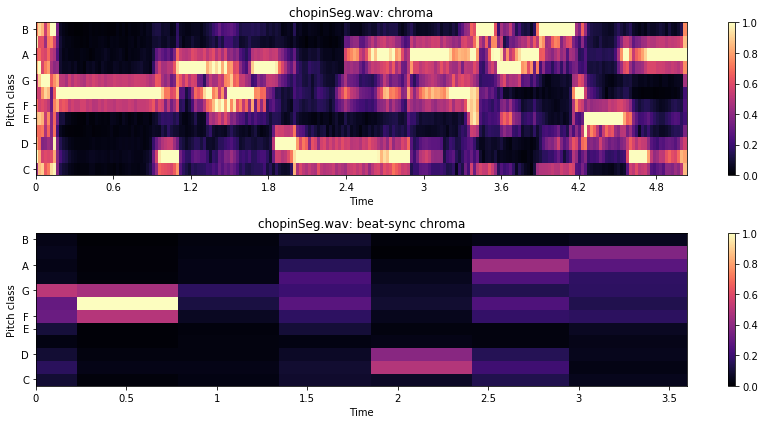

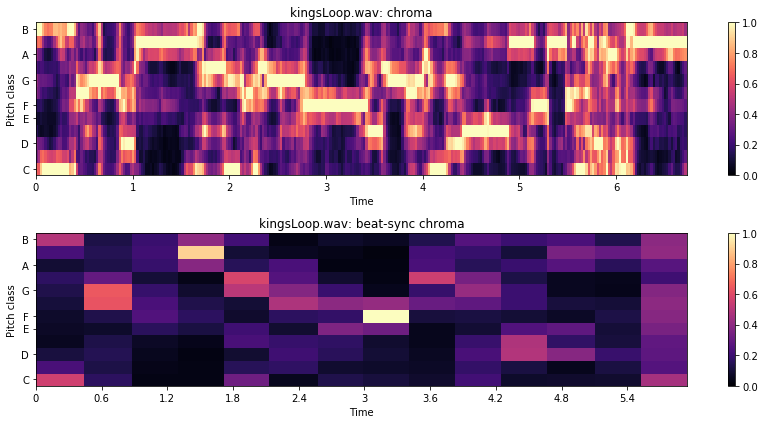

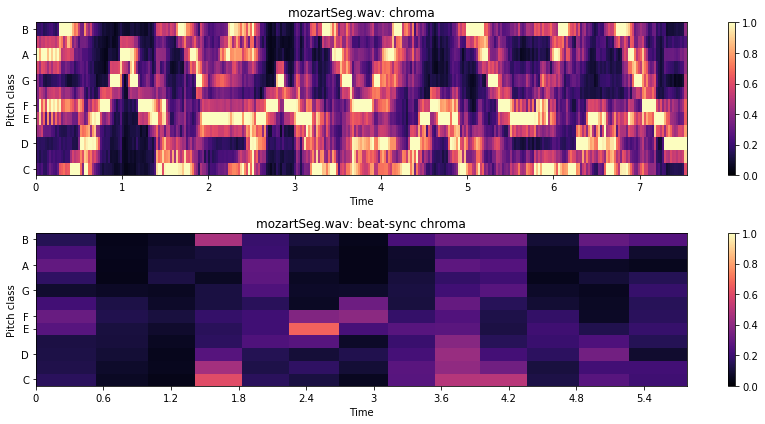

In [34]:
plot1 = beatsyncFunc('avm.wav', 'avm.wav: chroma', 'avm.wav: beat-sync chroma' )
plot2 = beatsyncFunc('chopinSeg.wav', 'chopinSeg.wav: chroma', 'chopinSeg.wav: beat-sync chroma')
plot3 = beatsyncFunc('kingsLoop.wav', 'kingsLoop.wav: chroma', 'kingsLoop.wav: beat-sync chroma')
plot4 = beatsyncFunc('mozartSeg.wav', 'mozartSeg.wav: chroma', 'mozartSeg.wav: beat-sync chroma')

